<a href="https://colab.research.google.com/github/akhil14shukla/IME672A-Extras/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import probplot 
import sklearn 
!pip install ppscore
import ppscore as pps

     |████████████████████████████████| 47 kB 2.6 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13067 sha256=1ebbc9c20d0c7f7ecd128f50622870cb6b584daa3d194fd9c64f826a119296d1
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore


In [6]:
df = pd.read_csv("Telco-Customer-Churn.csv")    # Reading the given CSV file

Data Analysis

In [7]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Description of a few features: <br>
* gender - Whether the customer is a male or a female
* SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
* Partner - Whether the customer has a partner or not (Yes, No)
* Dependents - Whether the customer has dependents or not (Yes, No)
* tenure - Number of months the customer has stayed with the company
* PhoneService - Whether the customer has a phone service or not (Yes, No)
* MultipleLines - Whether the customer has multiple lines or not, that is capable of holding some calls (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)


In [8]:
df.shape

(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Most of the data is categorical (might be ordinal or nominal).<br>
Number of features = 21 (20, if we ignore Customer ID) <br>
There are no missing or null values

In [14]:
sns.set(palette=sns.color_palette("Blues_r"),style="whitegrid", context = "paper")
sns.despine(top=True, left=True, bottom=False, right=False)

<Figure size 432x288 with 0 Axes>

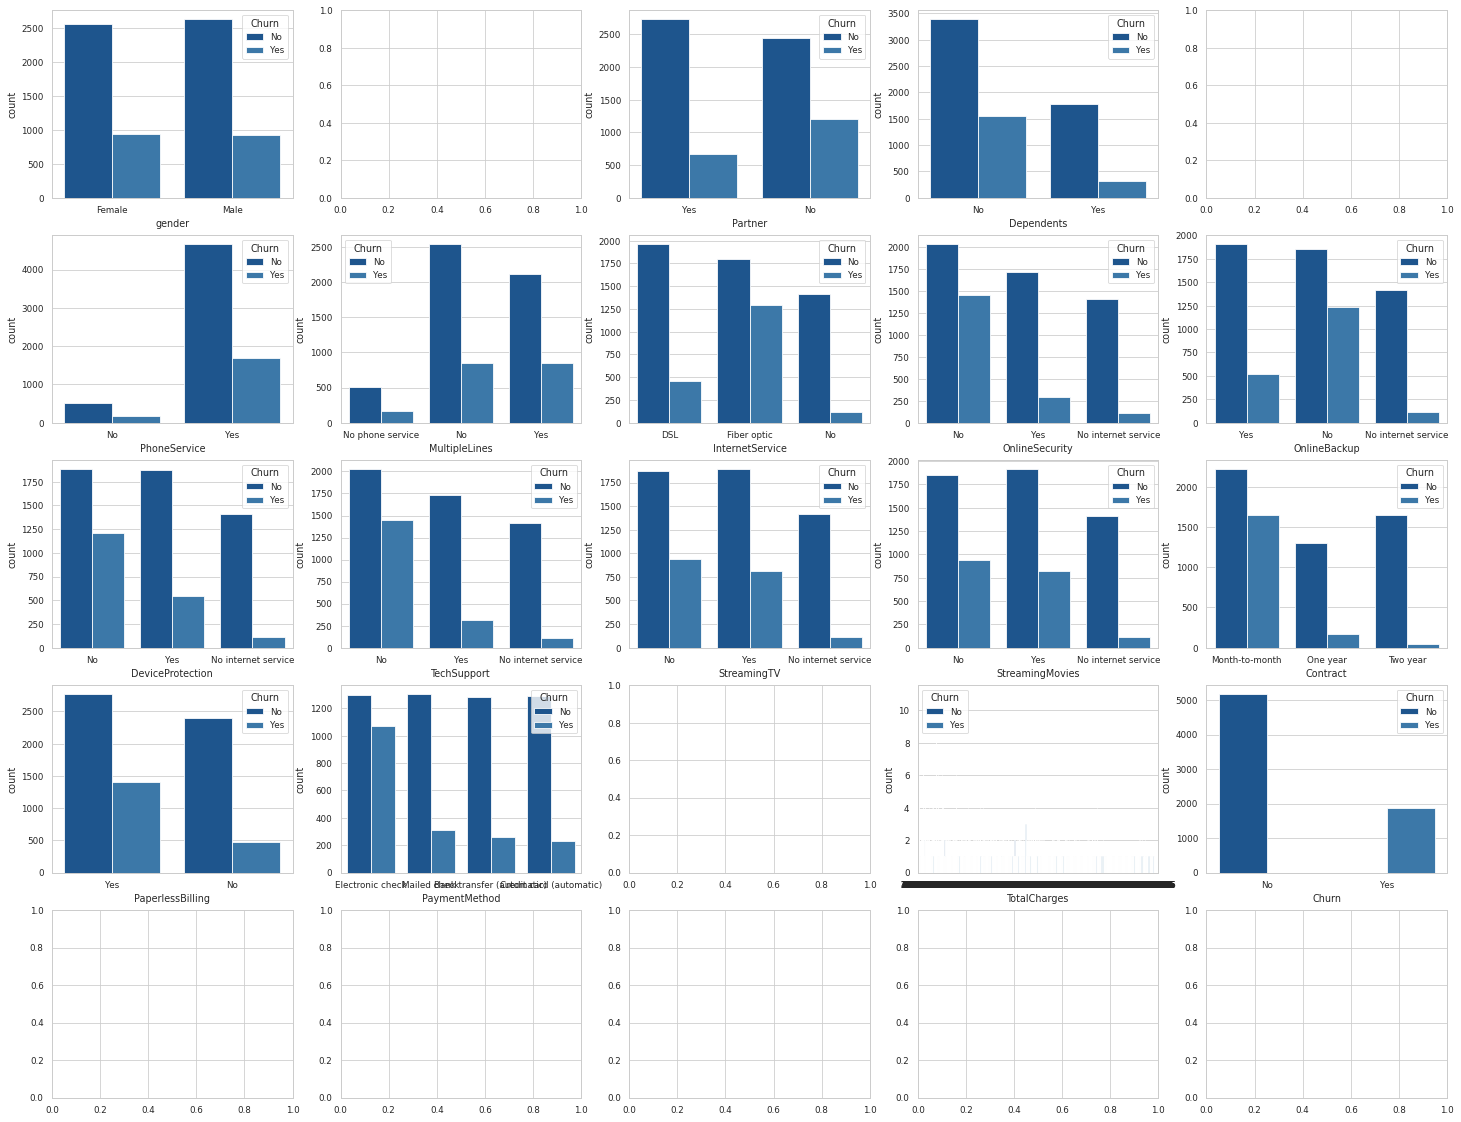

In [15]:
# PLotting barplot for categorical variables only, except customer ID
fig,axes = plt.subplots(5,4, figsize=(25, 20))
for i,ax in zip(df.columns[1:],axes.flatten()): 
    if(is_string_dtype(df[i])):
        sns.countplot(x=df[i],ax=ax,hue=df["Churn"])

Observation from the above plot:<br>
* In the given data, around 71% people **didn't churn** <br>
* Churn distribution is almost similar for both genders
* Electronic payment method has more churn rate as compared to other payment methods
* Month-to-Month contract has higher churn rate than other contracts. It is logical too, cause once you have bought the service for an year or two, people generally do not prefer changing the service due to the hassle it might cause.
* Customer with no Internet service (wherever this value is present) have a very low churn rate. (Maybe because they are not used to the modern technology, and do not prefer changing services)
* People with device protection and Tech-Support (Yes) have less churn rate than people with no device protection or Tech-Support (No), indicating that people are satisfied with the services provided
* Around 650 people didn't take phone service, number is relatively small compared to the total size of the dataset and won't be analyzed.
* People with dependencies or partners have comparatively less churn rate (Around 12.5% for dependencies and 69.5% for partners), than people with no partnes or dependencies.
* Customers with no internet services are generally from rural area or want to use their service for just calling or other purpose, thus leaving a very small margin for dissatisfaction and changing the service.
* Another interesting pattern in internet-services is customer with DSL have relatievely very less churn rate as compared to Fiber-optics, indicating dissatisfaction with the latter.

* A general patter can be observed: Customers who didn't take services like Online-Security, Online-Backup, Device-Support, Tech-Support, have higher churn rate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


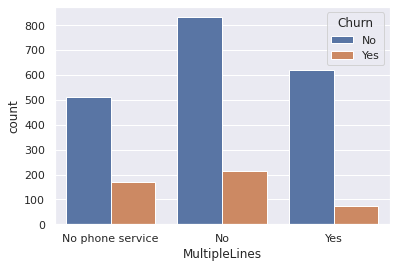

In [35]:
# sns.countplot(df[df["InternetService"]=="Fiber optic"]["OnlineSecurity"])
# sns.countplot(df[df["InternetService"]=="No"]["OnlineSecurity"])
# sns.countplot(df[df["InternetService"]=="No"]["OnlineBackup"])
sns.countplot(df[df["InternetService"]=="DSL"]["MultipleLines"],hue = df["Churn"])
plt.show()
# sns.countplot(df[df["InternetService"]=="Fiber optic"]["OnlineSecurity"])

# Customers with no internet service, do not have onlineSecurity, Online BAckup, Streaming TV, Tech-Support, Device-Protection, Streaming, Movies

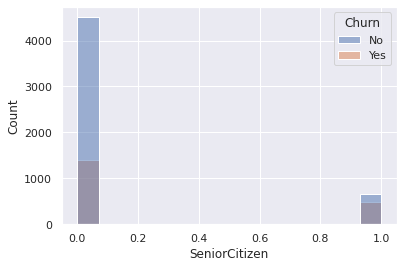

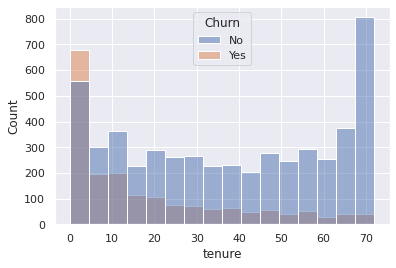

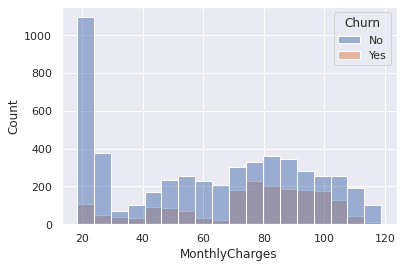

In [27]:
sns.set()
for i in (df.columns): 
    if(is_numeric_dtype(df[i])):
        sns.histplot(x=df[i],hue=df["Churn"])
        plt.show()

Observations from the above plots:
* People with less value of tenure are more likely to churn.
* Customer's whose monthly bill is less (<= 70) or among the greatest (>=110) are less likely to churn, than customers in the middle range.
* Senior citizens are more likely to churn

In [13]:
# pps_df = pps.matrix(df)

In [4]:
for i in df.columns:
    sns.lineplot(x=df[i], y = df["Churn"])
    plt.show()

NameError: ignored

In [5]:
# plot a scatter plot seaborn
for i in df.columns:
    for j in df.columns:
        if(i!=j):
            sns.scatterplot(x=df[i],y=df[j],hue=df["Churn"])
            plt.show()

NameError: ignored

In [ ]:
fig,axes = plt.subplots(5,5, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flatten()): 
    sns.boxplot(x=df[i],y=df["Churn"],ax=ax)
